<a href="https://colab.research.google.com/github/MorozovDesu/neural_network_technologies/blob/main/%22%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B2%D1%8B%D0%B5_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8_1_%D0%9B%D0%B0%D0%B1%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
---
ВАРИАНТ РАБОТЫ имеет вид: ZPN, где

Z=1-6 – вид закона распределения генерируемых признаков

1.     Биномиальное

2.     Геометрическое

3.     Гипергеометрическое

4.     Пуассона

5.     Равномерное

6.     Нормальное

P=2,3 – число признаков

N=3,4,5 – число классов

ПОРЯДОК ВЫПОЛНЕНИЯ РАБОТЫ

1.     Сгенерировать случайные числа по указанному закону распределения. Из них создается матрица из M строк (наблюдений) и P столбцов (признаков). Сгенерированные строки должны принадлежать одному из N классов за счет прибавления к сгенерированным числам положительной или отрицательной добавки (функция)
2.     Все признаки   должны быть числовыми и нормализованными (находиться в диапазоне [0,1]). Дополнительно создается классификационный признак.

3.     Разделить данные варианта на  обучающую и тестирующую выборки.

4.     Персептрон. Так как персептрон способен делить объекты только на два класса, то организуем работу итерационно:

        4.1.  Создать персептрон для отделения 1 класса от всех остальных. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 1 класса.

        4.2.  Создать персептрон для отделения 2 класса от оставшихся. Протестировать персептрон по обучающей и тестирующей выборкам и определить процент правильно классифицированных объектов 2 класса

        4.3.  Продолжить, пока не будут разделены все объекты

        4.4.  Построить графики разделяющей поверхности и визуальное представление результатов тестирования

5.     Сеть Кохонена (Kohonen). Вероятностная нейронная сеть (PNN).  Сеть с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Осуществить кластеризацию с помощью конкурирующей сети (слой Кохонена), а затем классификацию с помощью двух трехслойных сетей: вероятностной нейронной сети (PNN) и сети с прямым распрост­ра­нением сигнала и обрат­ным распространением ошибки (MLP). Для каждого вида сети выполнить следующие этапы:

     5.1 Создание сети

     5.2 Обучение сети на обучающей выборке

     5.3 Протестировать сеть отдельно по обучающей и по тестирующей выборке

     5.4 Построить визуальное представление результатов тестирования

     5.5 Оценить качество классификации в виде матриц

     5.6 Выдать число итераций обучения

6.     Оформить результаты в виде таблицы


In [983]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [984]:
# Указываем параметры
Z = 1  # Выбираем гипергеометричское распределение
P = 2  # Число признаков
N = 5  # Число классов

M = 100  # Число наблюдений
data = []
for i in range(N):

    ngood = np.random.randint(70, 100)
    nbad = 100 - ngood
    nsample = np.random.randint(1, 100)

    c = np.random.hypergeometric(ngood=ngood, nbad=nbad, nsample=nsample, size=(M, P))
    # ngood - количество "хороших" элементов в выборке
    # nbad - количество "плохих" элементов в выборке
    # nsample - общий размер выборки
    # size - форма матрицы данных

    data.append(c)

# Собираем признаки из всех классов
x = np.concatenate([c[:, 0] for c in data])  # Признаки по оси X
y = np.concatenate([c[:, 1] for c in data])  # Признаки по оси Y

xy = [[x[i], y[i]] for i in range(len(x))]

# Создаем список Y, присваивая каждому классу уникальное значение
# Y будет представлять классификационный признак,
# который указывает на принадлежность каждой точки данных к одному из 5 классов.
Y = []
for i in range(N):
    Y.extend([i] * M)

# Преобразуем список Y в массив numpy
Y = np.array(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

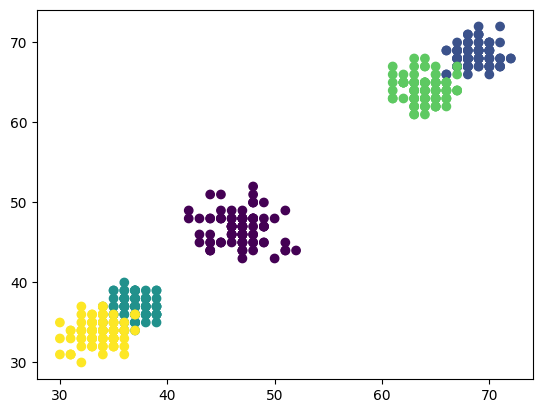

In [985]:
# Создаем DataFrame
res_df = pd.DataFrame(xy)
# Создаем двумерный рассеянный график
plt.scatter(x, y, c=Y)
# Показываем график
plt.show()

In [986]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0, 1))
scaler.fit(res_df)
standart_df = scaler.transform(res_df)
print(type(standart_df))
print(standart_df)

<class 'numpy.ndarray'>
[[0.33333333 0.42857143]
 [0.4047619  0.4047619 ]
 [0.38095238 0.4047619 ]
 [0.4047619  0.42857143]
 [0.42857143 0.5       ]
 [0.4047619  0.38095238]
 [0.38095238 0.42857143]
 [0.4047619  0.33333333]
 [0.38095238 0.4047619 ]
 [0.4047619  0.42857143]
 [0.33333333 0.33333333]
 [0.42857143 0.42857143]
 [0.4047619  0.4047619 ]
 [0.4047619  0.38095238]
 [0.45238095 0.35714286]
 [0.33333333 0.38095238]
 [0.4047619  0.42857143]
 [0.47619048 0.30952381]
 [0.33333333 0.35714286]
 [0.45238095 0.4047619 ]
 [0.30952381 0.38095238]
 [0.38095238 0.38095238]
 [0.30952381 0.42857143]
 [0.28571429 0.42857143]
 [0.45238095 0.42857143]
 [0.4047619  0.42857143]
 [0.38095238 0.38095238]
 [0.42857143 0.42857143]
 [0.4047619  0.4047619 ]
 [0.4047619  0.30952381]
 [0.4047619  0.45238095]
 [0.4047619  0.42857143]
 [0.35714286 0.45238095]
 [0.38095238 0.4047619 ]
 [0.4047619  0.4047619 ]
 [0.5        0.33333333]
 [0.4047619  0.38095238]
 [0.45238095 0.4047619 ]
 [0.4047619  0.35714286]
 

In [987]:
# Импортируем класс KMeans из библиотеки scikit-learn для кластеризации данных.
from sklearn.cluster import KMeans

# Создаем объект KMeans с параметрами:
# - n_clusters=5 указывает, что мы хотим разделить данные на 5 кластера.
# - random_state=0 используется для установки начального состояния генератора случайных чисел и обеспечения воспроизводимости результатов.
kmeans = KMeans(n_clusters=5,n_init=10, random_state=0)

# Обучаем модель K-Means на стандартизированных данных `standart_df`.
kmeans.fit(standart_df)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [988]:
# Создаем DataFrame `df_cluster_centers` для хранения координат центров кластеров.
df_cluster_centers = pd.DataFrame(kmeans.cluster_centers_)

# Выводим DataFrame `df_cluster_centers`, который содержит координаты центров кластеров.
print(df_cluster_centers)
print("----------------------------------------------------------------------------------")
print("матрица ошибок")
# Выводим матрицу ошибок, которая показывает, как точки данных распределены по кластерам
# и сравнивает это с истинными метками классов.
# `Y` содержит истинные метки классов, а `kmeans.labels_` содержит предсказанные метки кластеров.
confusion_mat = confusion_matrix(Y, kmeans.labels_)
print(confusion_mat)

          0         1
0  0.921667  0.914286
1  0.088120  0.087138
2  0.399762  0.399524
3  0.165973  0.166204
4  0.810952  0.812619
----------------------------------------------------------------------------------
матрица ошибок
[[  0   0 100   0   0]
 [ 98   0   0   0   2]
 [  0   4   0  96   0]
 [  2   0   0   0  98]
 [  0  93   0   7   0]]


In [989]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Ваш код для создания объекта KMeans и кластеризации данных

# # Создаем двумерный рассеянный график
# plt.scatter(res_df[0], res_df[1], c=kmeans.labels_)

# # Показываем график точек данных

# # Добавляем точки для центров кластеров внутри кластеров
# for cluster_center in df_cluster_centers:
#     cluster_points = res_df[kmeans.labels_ == cluster_center]
#     center_x, center_y = cluster_points.mean(axis=0)
#     plt.scatter(center_x, center_y, c='red', marker='x')

# # Показываем график
# plt.show()


In [990]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(standart_df, kmeans.labels_, test_size=0.5, random_state=42)

# X_train - обучающие признаки
# X_test - тестовые признаки
# y_train - метки обучающих данных
# y_test - метки тестовых данных

In [991]:
print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)
assert len(X_train) + len(X_test) == len(standart_df), "Выборки пересекаются или неправильно разделены."
print("----------------------------------------------------------------------------------")
print("Форма y_train:", y_train.shape)
print("Форма y_test:", y_test.shape)
assert len(y_train) + len(y_test) == len(standart_df), "Выборки пересекаются или неправильно разделены."
print("----------------------------------------------------------------------------------")
# Вывести первые несколько объектов данных (первые 5, например)
print("Первые 5 объектов X_train:")
print(X_train[:5])

print("Первые 5 объектов y_train:")
print(y_train[:5])

print("Первые 5 объектов X_test:")
print(X_test[:5])

print("Первые 5 объектов y_test:")
print(y_test[:5])

Форма X_train: (250, 2)
Форма X_test: (250, 2)
----------------------------------------------------------------------------------
Форма y_train: (250,)
Форма y_test: (250,)
----------------------------------------------------------------------------------
Первые 5 объектов X_train:
[[0.07142857 0.0952381 ]
 [0.19047619 0.19047619]
 [0.02380952 0.0952381 ]
 [0.92857143 0.92857143]
 [0.21428571 0.14285714]]
Первые 5 объектов y_train:
[1 3 1 0 3]
Первые 5 объектов X_test:
[[0.78571429 0.80952381]
 [0.38095238 0.38095238]
 [0.83333333 0.78571429]
 [0.88095238 0.92857143]
 [0.92857143 0.88095238]]
Первые 5 объектов y_test:
[4 2 4 0 0]


# Персептрон

In [992]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) #    2    np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias # тут ошибка
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
    #функция активации
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


In [993]:
# Создайте экземпляр класса Perceptron
perceptron = Perceptron(learning_rate=0.05, n_iters=5000)

# Обучите персептрон на обучающих данных
perceptron.fit(X_train, y_train)

# Выполните предсказания на трансформированных данных X_test
predictions = perceptron.predict(X_test)

# Определите процент правильно классифицированных объектов
correct_classifications = np.sum(predictions == y_test)
total_objects = len(y_test)
accuracy = correct_classifications / total_objects * 100

print(f"Процент правильно классифицированных объектов: {accuracy}%")


Процент правильно классифицированных объектов: 18.0%


In [994]:
#отделяем первый класс от других  в обучающей выборке
y_train1 = [[] for _ in range(len(y_train))]#создаем массив для отделения из Y_train 1 класса
for _ in range(len(y_train)):
    if y_train[_] == 0:
        y_train1[_] = 1
    else:
        y_train1[_] = 0
Y_train1 = np.array(y_train1)
Y_train1 = Y_train1.reshape((len(y_train), 1))

#отделяем первый класс от других  в тестирующей выборке
Y_test1 = [[] for _ in range(len(y_test))]#создаем массив для отделения из Y_train 1 класса
for _ in range(len(y_test)):
    if y_test[_] == 0:
        Y_test1[_] = 1
    else:
        Y_test1[_] = 0
y_test1 = np.array(Y_test1)
y_test1 = y_test1.reshape((len(y_test), 1))


dfff = pd.DataFrame(X_train)

In [995]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(
        x=dfff[0], y=dfff[1], mode='markers', marker=dict(size=6, color=y_train1)
    )
])

fig.update_layout(xaxis_title='Feature 0', yaxis_title='Feature 1')
fig.show()


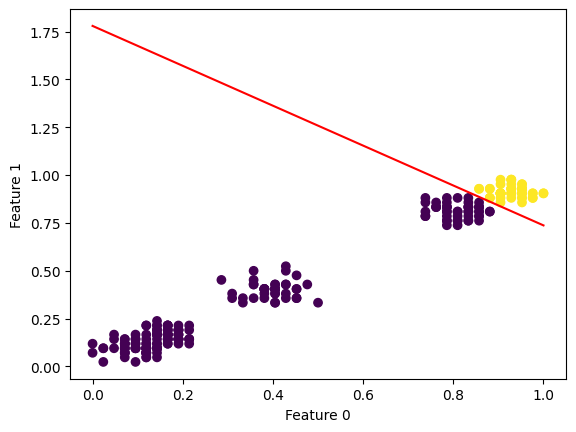

[[201   0]
 [  0  49]]


In [996]:
import matplotlib.pyplot as plt

per = Perceptron(n_iters=1000)

per.fit(X_train, y_train1)
perTrain1 = per.predict(X_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = np.amin(X_train[:, 1])
x1_2 = np.amax(X_train[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train[:, 0], X_train[:, 1], c=perTrain1, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train1, perTrain1)
print(distinctions)


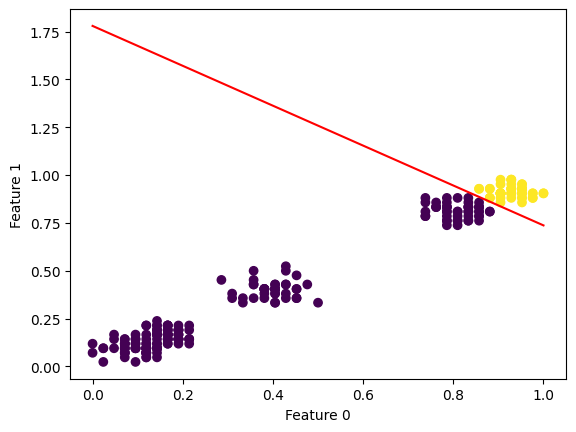

[[160  41]
 [ 40   9]]


In [997]:
perTest = per.predict(X_test)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = np.amin(X_train[:, 1])
x1_2 = np.amax(X_train[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train[:, 0], X_train[:, 1], c=perTrain1, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train1, perTest)
print(distinctions)

In [998]:
#убираем 1 класс из обучающей выборки
y_train2 = np.delete(y_train, np.where(y_train == [0]), axis=0)
X_train2 = np.delete(X_train, np.where(y_train == [0]), axis=0)
print(len(y_train2))
print(len(X_train2))
print(y_train2)
for _ in range(len(y_train2)):
    if y_train2[_] == 1:
        y_train2[_] = 1
    else:
        y_train2[_] = 0
print(y_train2)

#убираем 1 класс из тестовой выборки
y_test2 = np.delete(y_test, np.where(y_test == [0]), axis=0)
X_test2 = np.delete(X_test, np.where(y_test == [0]), axis=0)
print(len(y_train2))
print(len(X_train2))

for _ in range(len(y_test2)):
    if y_test2[_] == 1:
        y_test2[_] = 1
    else:
        y_test2[_] = 0
# print(y_test2)

201
201
[1 3 1 3 1 4 1 3 4 2 3 1 2 1 3 3 4 3 4 4 4 3 4 3 3 3 1 3 1 3 4 3 4 4 4 1 1
 1 1 3 4 3 3 4 3 1 4 3 3 4 4 1 2 1 2 3 2 3 4 4 2 2 2 4 4 3 2 2 3 1 4 2 1 1
 3 3 3 1 2 3 1 3 1 3 2 3 3 2 2 2 3 4 3 1 2 1 3 3 3 1 2 1 2 4 1 2 4 2 2 4 1
 1 3 3 1 1 4 3 3 1 3 1 3 1 1 4 4 3 3 2 3 1 4 3 2 4 2 1 1 2 1 2 3 2 3 3 4 2
 4 1 2 4 3 3 2 4 2 4 1 4 1 4 1 4 3 2 4 2 1 1 3 2 2 4 3 3 2 4 1 3 1 4 3 1 4
 3 4 4 2 4 2 1 4 3 1 1 2 2 1 4 1]
[1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1]
201
201


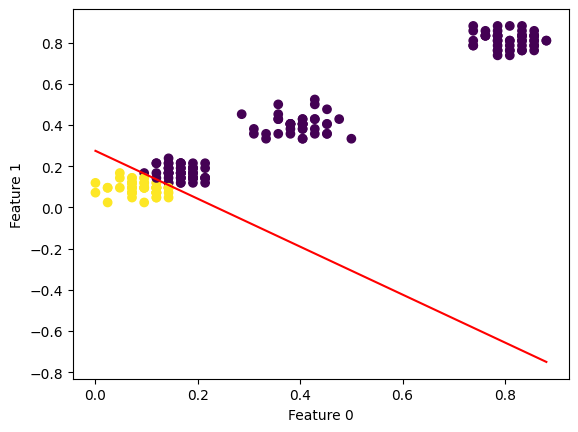

[[149   0]
 [  0  52]]


In [999]:
import matplotlib.pyplot as plt

per = Perceptron(n_iters=1000)

per.fit(X_train2, y_train2)
perTrain2 = per.predict(X_train2)

x0_1 = np.amin(X_train2[:, 0])
x0_2 = np.amax(X_train2[:, 0])

x1_1 = np.amin(X_train2[:, 1])
x1_2 = np.amax(X_train2[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=perTrain2, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train2, perTrain2)
print(distinctions)


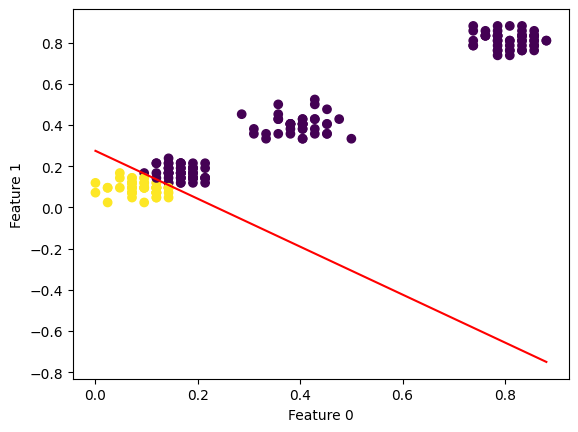

ValueError: ignored

In [1002]:
perTest2 = per.predict(X_test2)

x0_1 = np.amin(X_train2[:, 0])
x0_2 = np.amax(X_train2[:, 0])

x1_1 = np.amin(X_train2[:, 1])
x1_2 = np.amax(X_train2[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=perTrain2, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train2, perTest2)
print(distinctions)

In [ ]:
#Убираем 2 класс из обучающей выборки
indices_to_remove = np.where((y_train == 0) | (y_train == 1))
X_train3 = np.delete(X_train, indices_to_remove, axis=0)
y_train3 = np.delete(y_train, indices_to_remove, axis=0)
print(len(y_train3))
print(len(X_train3))
print(y_train3)
for _ in range(len(y_train3)):
    if y_train3[_] == 2:
        y_train3[_] = 1
    else:
        y_train3[_] = 0

#убираем 2 класс из тестовой выборки
indices_to_remove = np.where((y_test == 0) | (y_test == 1))
X_test3 = np.delete(X_test, indices_to_remove, axis=0)
y_test3 = np.delete(y_test, indices_to_remove, axis=0)

print(len(y_train3))
print(len(X_train3))

for _ in range(len(y_test3)):
    if y_test3[_] == 2:
        y_test3[_] = 1
    else:
        y_test3[_] = 0
print(y_train3)

In [ ]:
import matplotlib.pyplot as plt

per = Perceptron(n_iters=1000)

per.fit(X_train3, y_train3)
perTrain = per.predict(X_train3)

x0_1 = np.amin(X_train3[:, 0])
x0_2 = np.amax(X_train3[:, 0])

x1_1 = np.amin(X_train3[:, 1])
x1_2 = np.amax(X_train3[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=perTrain, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train3, perTrain)
print(distinctions)


In [ ]:
perTest = per.predict(X_test3)

x0_1 = np.amin(X_train3[:, 0])
x0_2 = np.amax(X_train3[:, 0])

x1_1 = np.amin(X_train3[:, 1])
x1_2 = np.amax(X_train3[:, 1])

x = [x0_1, x0_2]
y = [x1_1, x1_2]

# Пересчет коэффициентов разделяющей прямой для двух признаков
slope = -per.weights[0] / per.weights[1]
intercept = -per.bias / per.weights[1]

# Вычисление точек для разделяющей прямой
x_line = np.array([x0_1, x0_2])
y_line = slope * x_line + intercept

# Построение двумерного рассеянного графика
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=perTest, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Построение разделяющей прямой
plt.plot(x_line, y_line, color='red')
plt.show()

# Матрица различий
distinctions = confusion_matrix(y_train3, perTest)
print(distinctions)